In [5]:
import numpy as np
from figaro.mixture import DPGMM
from figaro.plot import plot_median_cr
from figaro.utils import get_priors
from figaro.load import save_density
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
data_realistic = np.loadtxt('./data/realistic.txt')

In [4]:
M_min = 0
M_max = 200
n_draws = 1000

mix_realistic = DPGMM([[M_min, M_max]], prior_pars=get_priors([[M_min, M_max]], data_realistic))
draws_realistic = np.array([mix_realistic.density_from_samples(data_realistic) for _ in tqdm(range(n_draws))])

100%|██████████| 1000/1000 [36:00<00:00,  2.16s/it]


In [29]:
save_density(draws_realistic)

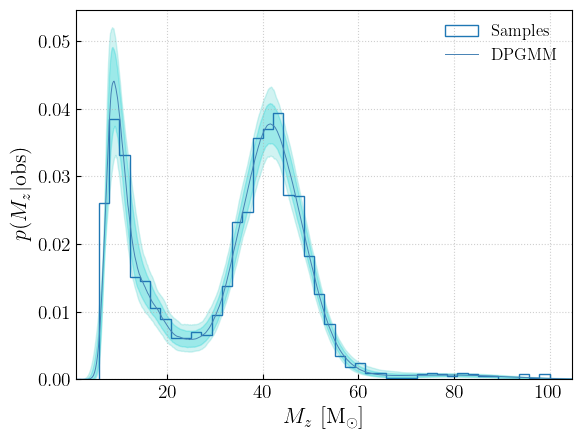

In [30]:
fig = plot_median_cr(draws_realistic, samples=data_realistic, save=True, show=False)
fig.axes[0].set_xlabel('$M_z\ [\mathrm{M}_\odot]$')
fig.axes[0].set_ylabel('$p(M_z|\mathrm{obs})$')
# fig.savefig('./observed_figaro.pdf', bbox_inches='tight')
fig